In [17]:
# TERA RTX 2050 KA ULTIMATE SPEED CODE (hamesha upar daal dena)
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Image size 192×192 (speed + accuracy ka perfect balance)
# target_size = (192, 192)
# batch_size = 32



In [18]:
import shutil 
shutil.rmtree("/content/small_dataaset", ignore_errors=True)
shutil.rmtree("/content/small_train", ignore_errors=True)
shutil.rmtree("/content/small_val", ignore_errors=True)


In [19]:
import zipfile
import os

zip_path = "brain-tumor-mri-dataset.zip"          # uploaded file ka naam
extract_path = "/content/dataaset" # at whch directory
                                  # we have to extract
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction done! Files are in:", extract_path)

Extraction done! Files are in: /content/dataaset


In [20]:
print(os.listdir(extract_path))

['Testing', 'Training']


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

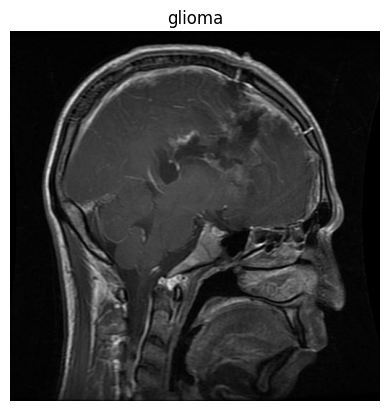

In [22]:
import os, random, matplotlib.pyplot as plt, matplotlib.image as mpimg
G = "/content/dataaset/Training/glioma"
for i in random.sample(os.listdir(G), 1):
    plt.imshow(mpimg.imread(os.path.join(G, i)), cmap='gray')
    plt.title("glioma")
    plt.axis('off')
    plt.show()


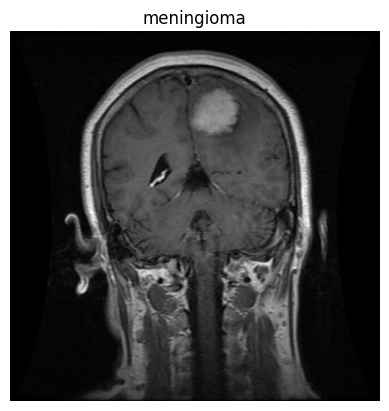

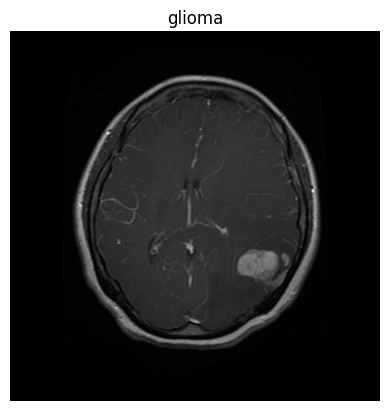

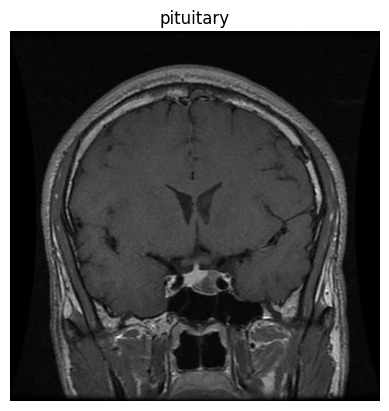

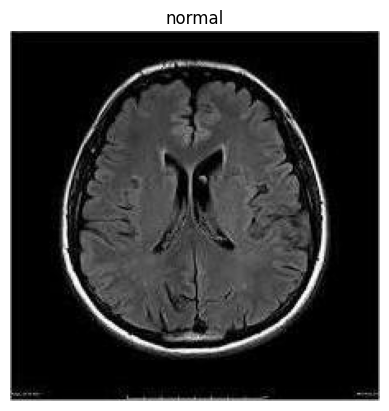

In [23]:
import os, random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 4 class folders ke paths
paths = {
    "meningioma": "/content/dataaset/Training/meningioma",
    "glioma": "/content/dataaset/Training/glioma",
    "pituitary": "/content/dataaset/Training/pituitary",
    "normal": "/content/dataaset/Training/notumor"
}

# Har class se 1 random image display
for label, folder in paths.items():
    img_name = random.choice(os.listdir(folder))       # ek random image
    img_path = os.path.join(folder, img_name)

    img = mpimg.imread(img_path)
    plt.imshow(img, cmap='gray')  # grayscale hai to cmap='gray'
    plt.title(label)
    plt.axis('off')
    plt.show()


In [24]:
# mini batch training ..
# this 250 - 250 dataset we  have assigned into
#  newly made "small datase " folder from
# "content/dataset/training" directory"
import os, random, shutil

classes = ["notumor", "pituitary", "meningioma", "glioma"]
original_base = "/content/dataaset/Training"
subset_base = "/content/small_dataaset"
os.makedirs(subset_base, exist_ok=True)

for cls in classes:
    os.makedirs(os.path.join(subset_base, cls), exist_ok=True)
    images = os.listdir(os.path.join(original_base, cls))
    random.seed(42)   
    selected = random.sample(images, 1200)  # 250 images per class
    for img in selected:
        shutil.copy(os.path.join(original_base, cls, img),
                    os.path.join(subset_base, cls, img))


In [25]:
import os

subset_base = "/content/small_dataaset"
classes = ["notumor", "pituitary", "meningioma", "glioma"]

for cls in classes:
    path = os.path.join(subset_base, cls)
    count = len(os.listdir(path))
    print(f"{cls} images:", count)

notumor images: 1200
pituitary images: 1200
meningioma images: 1200
glioma images: 1200


In [26]:
from sklearn.model_selection import train_test_split

train_dir = "/content/small_train"
val_dir   = "/content/small_val"

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

for cls in classes:
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(val_dir, cls), exist_ok=True)

    images = os.listdir(os.path.join(subset_base, cls))
    train_imgs, val_imgs = train_test_split(images, test_size=0.2, random_state=42)

    for img in train_imgs:
        shutil.copy(os.path.join(subset_base, cls, img),
                    os.path.join(train_dir, cls, img))
    for img in val_imgs:
        shutil.copy(os.path.join(subset_base, cls, img),
                    os.path.join(val_dir, cls, img))


In [27]:
import os

train_dir = "/content/small_train"
classes = ["notumor", "pituitary", "meningioma", "glioma"]

for cls in classes:
    path = os.path.join(train_dir, cls)
    count = len(os.listdir(path))
    print(f"{cls} train images:", count)


notumor train images: 960
pituitary train images: 960
meningioma train images: 960
glioma train images: 960


In [28]:
import os

val_dir = "/content/small_val"   # tumhara validation directory
classes = ["notumor", "pituitary", "meningioma", "glioma"]

for cls in classes:
    path = os.path.join(val_dir, cls)
    count = len(os.listdir(path))
    print(f"{cls} images in validation:", count)


notumor images in validation: 240
pituitary images in validation: 240
meningioma images in validation: 240
glioma images in validation: 240


# Loading the Dataset and processing

In [29]:
# Step 1: Imports
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
import matplotlib.pyplot as plt

# Step 2: Paths set karo (apne folder ke hisaab se)
train_dir = '/content/small_train'      # example: "dataset/train"
val_dir   = '/content/small_val'         # example: "dataset/val"

# Step 3: Modern way se dataset load karo (ImageDataGenerator ko bhool jao)
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(128, 128),
    batch_size=16,
    label_mode='categorical',    # agar 2 se zyada classes hain
    shuffle=True,
    seed=123
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(128, 128),
    batch_size=16,
    label_mode='categorical',
    shuffle=False
)

# Optional: Validation ko bhi cache kar do speed ke liye
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds   = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Found 3840 files belonging to 4 classes.
Found 960 files belonging to 4 classes.


# Defining Data Augmentation

In [30]:
# Step 4: Data Augmentation layers banao (ye GPU pe bhi fast chalti hain)
data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.15),
    layers.RandomZoom(0.15),
    layers.RandomHeight(0.1),
    layers.RandomWidth(0.1),
    layers.RandomContrast(0.2),
], name='augmentation')

# Covolution Architecture By Pretrained Model 

In [31]:
# making  covolution by pretrained model "efficientNetB3"
base_model = tf.keras.applications.EfficientNetB3(
    weights='imagenet',
    include_top=False,
    input_shape=(128, 128, 3)
)
base_model.trainable = False   # pehle freeze karo (transfer learning)
num_classes = len(os.listdir(train_dir)) 
model = Sequential([
    layers.Input(shape=(128,128, 3)),
    
    data_augmentation,                    # augmentation yahi lagao
    
    layers.Rescaling(1./255),             # rescale yaha karo, bahar nahi
    
    base_model,
    
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    
    layers.Dense(num_classes, activation='softmax')  # num_classes = len(train_ds.class_names)
], name="Modern_EfficientNet")

model.summary()

Model: "Modern_EfficientNet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ augmentation (Sequential)            │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_5 (Rescaling)              │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb3 (Functional)          │ (None, None, None, 1536)    │      10,783,535 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1536)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 1536)                │           6,144 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1536)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,578,675 (44.17 MB)

 Trainable params: 792,068 (3.02 MB)

 Non-trainable params: 10,786,607 (41.15 MB)

# Compiling

In [ ]:
# Step 6: Compile & Train
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks (must hai bhai)
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=7, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3),
    tf.keras.callbacks.ModelCheckpoint("best_model.keras", save_best_only=True)
]

# Training shuru!
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=callbacks
)


Epoch 1/50
 13/240 ━━━━━━━━━━━━━━━━━━━━ 1:23 366ms/step - accuracy: 0.3764 - loss: 1.9403